In [19]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset
from torchvision import transforms
from torchvision.utils import save_image
from tqdm import tqdm
%run ConV_VAE.ipynb
# %run bigger_latent_space.ipynb
%run loader.ipynb
%run test.ipynb
%run train.ipynb

In [20]:
plt.rcParams['figure.dpi'] = 100
device = 'cuda' if torch.cuda.is_available() else 'cpu'
####### IMPORTANT ######
# set this flag to true if you want to load the model beforehand
load = False
# specify which model you want to load
model_name = None

latent_space = 2048
batch_size=64

In [21]:
normalize = transforms.Lambda(lambda x : x / 255.0)
transform = transforms.Compose([
    transforms.ToTensor(),
    #transforms.Resize(100, antialias=True),
    normalize
])
train_data = CustomImageDataset('../data/sign_mnist_train.csv', transform=transform)
test_data = CustomImageDataset('../data/sign_mnist_test.csv', transform=transform)

In [22]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [23]:
model = ConvVarAutoencoder().to(device)
if (False):
    model.load_state_dict(torch.load(model_name, map_location=device))

criterion = F.mse_loss
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.1)

In [24]:
epochs = 51
train_losses = []
test_losses = []
for epoch in tqdm(range(epochs)):  # loop over the dataset multiple times
    # Train on data
    train_loss = train_vae(train_loader, model, optimizer, device)
    test_loss = test(epoch, model, test_loader)
    print('====> Average Training loss per image: {:.4f}'.format(train_loss.item()))
    print('====>Average  Test set loss per image : {:.4f}'.format(test_loss))
    if epoch % 5 == 0:
        torch.save(model.state_dict(), "../model/50_no_SR" + str(epoch) + ".pt")
        with torch.no_grad():
            sample = torch.randn(batch_size, latent_space).to(device)
            sample = model.decoder(sample).cpu()
            save_image(sample.view(batch_size, 1, 100, 100),
                       '../results/' + str(epoch) + '.png')
    train_losses.append(train_loss.cpu().detach().numpy())
    test_losses.append(test_loss)

  0%|          | 0/51 [00:00<?, ?it/s]

====> Average Training loss per image: 12700.7393
====>Average  Test set loss per image : 1038.2386


  4%|▍         | 2/51 [07:19<2:58:59, 219.18s/it]

====> Average Training loss per image: 903.3270
====>Average  Test set loss per image : 873.1646


  6%|▌         | 3/51 [09:50<2:30:18, 187.89s/it]

====> Average Training loss per image: 849.6873
====>Average  Test set loss per image : 838.3408


  8%|▊         | 4/51 [11:16<1:55:49, 147.86s/it]

====> Average Training loss per image: 829.2068
====>Average  Test set loss per image : 830.9742


 10%|▉         | 5/51 [12:49<1:38:09, 128.03s/it]

====> Average Training loss per image: 819.7134
====>Average  Test set loss per image : 825.3022
====> Average Training loss per image: 814.3991
====>Average  Test set loss per image : 823.9450


 14%|█▎        | 7/51 [16:00<1:20:25, 109.67s/it]

====> Average Training loss per image: 811.1559
====>Average  Test set loss per image : 818.9897


 16%|█▌        | 8/51 [17:44<1:17:15, 107.80s/it]

====> Average Training loss per image: 808.0668
====>Average  Test set loss per image : 818.5603


 18%|█▊        | 9/51 [19:17<1:12:12, 103.16s/it]

====> Average Training loss per image: 805.7927
====>Average  Test set loss per image : 816.0702


 20%|█▉        | 10/51 [20:48<1:07:51, 99.30s/it]

====> Average Training loss per image: 803.3680
====>Average  Test set loss per image : 816.5469
====> Average Training loss per image: 802.1848
====>Average  Test set loss per image : 814.5528


 24%|██▎       | 12/51 [23:51<1:01:59, 95.37s/it]

====> Average Training loss per image: 799.9672
====>Average  Test set loss per image : 816.2717


 25%|██▌       | 13/51 [25:24<59:52, 94.55s/it]  

====> Average Training loss per image: 798.7607
====>Average  Test set loss per image : 814.2444


 27%|██▋       | 14/51 [27:23<1:02:48, 101.86s/it]

====> Average Training loss per image: 796.9359
====>Average  Test set loss per image : 813.0868


 29%|██▉       | 15/51 [29:06<1:01:23, 102.33s/it]

====> Average Training loss per image: 795.9962
====>Average  Test set loss per image : 814.1737
====> Average Training loss per image: 794.5070
====>Average  Test set loss per image : 813.3768


 33%|███▎      | 17/51 [32:48<1:00:14, 106.30s/it]

====> Average Training loss per image: 793.4977
====>Average  Test set loss per image : 812.7985


 35%|███▌      | 18/51 [34:26<57:00, 103.66s/it]  

====> Average Training loss per image: 792.7556
====>Average  Test set loss per image : 811.4799


 37%|███▋      | 19/51 [36:00<53:43, 100.75s/it]

====> Average Training loss per image: 791.4988
====>Average  Test set loss per image : 811.1901


 39%|███▉      | 20/51 [37:46<52:54, 102.42s/it]

====> Average Training loss per image: 790.6263
====>Average  Test set loss per image : 810.9479
====> Average Training loss per image: 790.6467
====>Average  Test set loss per image : 811.5554


 43%|████▎     | 22/51 [40:50<46:51, 96.96s/it] 

====> Average Training loss per image: 789.3270
====>Average  Test set loss per image : 810.5360


 45%|████▌     | 23/51 [42:23<44:48, 96.03s/it]

====> Average Training loss per image: 788.4156
====>Average  Test set loss per image : 816.5990


 47%|████▋     | 24/51 [44:02<43:34, 96.82s/it]

====> Average Training loss per image: 788.2669
====>Average  Test set loss per image : 810.9485


 49%|████▉     | 25/51 [45:57<44:16, 102.17s/it]

====> Average Training loss per image: 787.3672
====>Average  Test set loss per image : 809.8998
====> Average Training loss per image: 786.8851
====>Average  Test set loss per image : 809.2906


 53%|█████▎    | 27/51 [49:06<39:13, 98.07s/it] 

====> Average Training loss per image: 786.3557
====>Average  Test set loss per image : 810.7039


 55%|█████▍    | 28/51 [50:36<36:41, 95.71s/it]

====> Average Training loss per image: 786.1844
====>Average  Test set loss per image : 809.8346


 57%|█████▋    | 29/51 [52:13<35:12, 96.02s/it]

====> Average Training loss per image: 785.5862
====>Average  Test set loss per image : 809.5517


 59%|█████▉    | 30/51 [53:47<33:25, 95.50s/it]

====> Average Training loss per image: 785.1697
====>Average  Test set loss per image : 810.2721
====> Average Training loss per image: 784.3052
====>Average  Test set loss per image : 809.8050


 63%|██████▎   | 32/51 [56:59<30:18, 95.72s/it]

====> Average Training loss per image: 784.0118
====>Average  Test set loss per image : 807.8113


 65%|██████▍   | 33/51 [58:33<28:32, 95.13s/it]

====> Average Training loss per image: 783.2954
====>Average  Test set loss per image : 808.7734


 67%|██████▋   | 34/51 [1:00:08<26:55, 95.04s/it]

====> Average Training loss per image: 782.2690
====>Average  Test set loss per image : 807.8252


 69%|██████▊   | 35/51 [1:01:40<25:08, 94.29s/it]

====> Average Training loss per image: 781.9730
====>Average  Test set loss per image : 807.7324
====> Average Training loss per image: 781.2726
====>Average  Test set loss per image : 807.5506


 73%|███████▎  | 37/51 [1:04:58<22:37, 96.93s/it]

====> Average Training loss per image: 781.0241
====>Average  Test set loss per image : 806.8541


 75%|███████▍  | 38/51 [1:06:33<20:55, 96.55s/it]

====> Average Training loss per image: 780.3611
====>Average  Test set loss per image : 807.5167


 76%|███████▋  | 39/51 [1:08:05<18:59, 95.00s/it]

====> Average Training loss per image: 779.9898
====>Average  Test set loss per image : 808.0031


 78%|███████▊  | 40/51 [1:09:35<17:10, 93.66s/it]

====> Average Training loss per image: 779.9245
====>Average  Test set loss per image : 805.8574
====> Average Training loss per image: 779.4595
====>Average  Test set loss per image : 805.7570


 82%|████████▏ | 42/51 [1:12:59<14:38, 97.61s/it]

====> Average Training loss per image: 778.9993
====>Average  Test set loss per image : 805.6882


 84%|████████▍ | 43/51 [1:14:29<12:44, 95.59s/it]

====> Average Training loss per image: 778.3010
====>Average  Test set loss per image : 806.8975


 86%|████████▋ | 44/51 [1:16:00<10:58, 94.03s/it]

====> Average Training loss per image: 778.1396
====>Average  Test set loss per image : 805.2628


 88%|████████▊ | 45/51 [1:17:34<09:23, 93.97s/it]

====> Average Training loss per image: 777.4654
====>Average  Test set loss per image : 806.4988
====> Average Training loss per image: 777.2419
====>Average  Test set loss per image : 804.0817


 92%|█████████▏| 47/51 [1:20:40<06:13, 93.49s/it]

====> Average Training loss per image: 776.7424
====>Average  Test set loss per image : 806.0444


 94%|█████████▍| 48/51 [1:22:15<04:42, 94.03s/it]

====> Average Training loss per image: 775.7789
====>Average  Test set loss per image : 805.1190


 96%|█████████▌| 49/51 [1:23:48<03:07, 93.83s/it]

====> Average Training loss per image: 775.5804
====>Average  Test set loss per image : 806.0455


 98%|█████████▊| 50/51 [1:25:20<01:33, 93.12s/it]

====> Average Training loss per image: 775.1098
====>Average  Test set loss per image : 805.0293
====> Average Training loss per image: 774.6528
====>Average  Test set loss per image : 803.1624


100%|██████████| 51/51 [1:26:58<00:00, 102.32s/it]


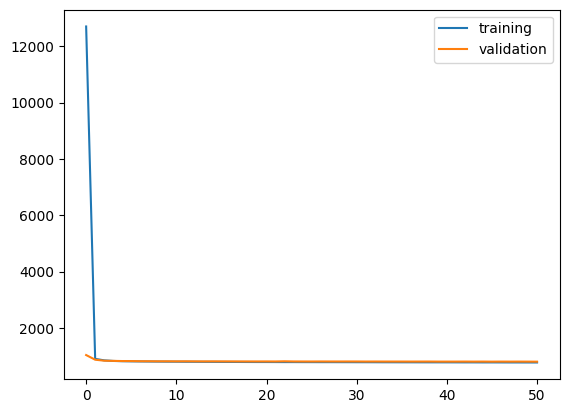

In [25]:
plt.plot(train_losses, label="training")
plt.plot(test_losses, label="validation")
plt.legend()
plt.show()